C:\Users\user\anaconda3\lib\site-packages\evds\__init__.py:42: FutureWarning: Could not cast to int32, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  main_categories_df = pd.DataFrame(main_categories_raw, dtype="int")[["CATEGORY_ID","TOPIC_TITLE_" + self.lang]]
C:\Users\user\anaconda3\lib\site-packages\evds\__init__.py:180: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df = pd.DataFrame(data, dtype="float")


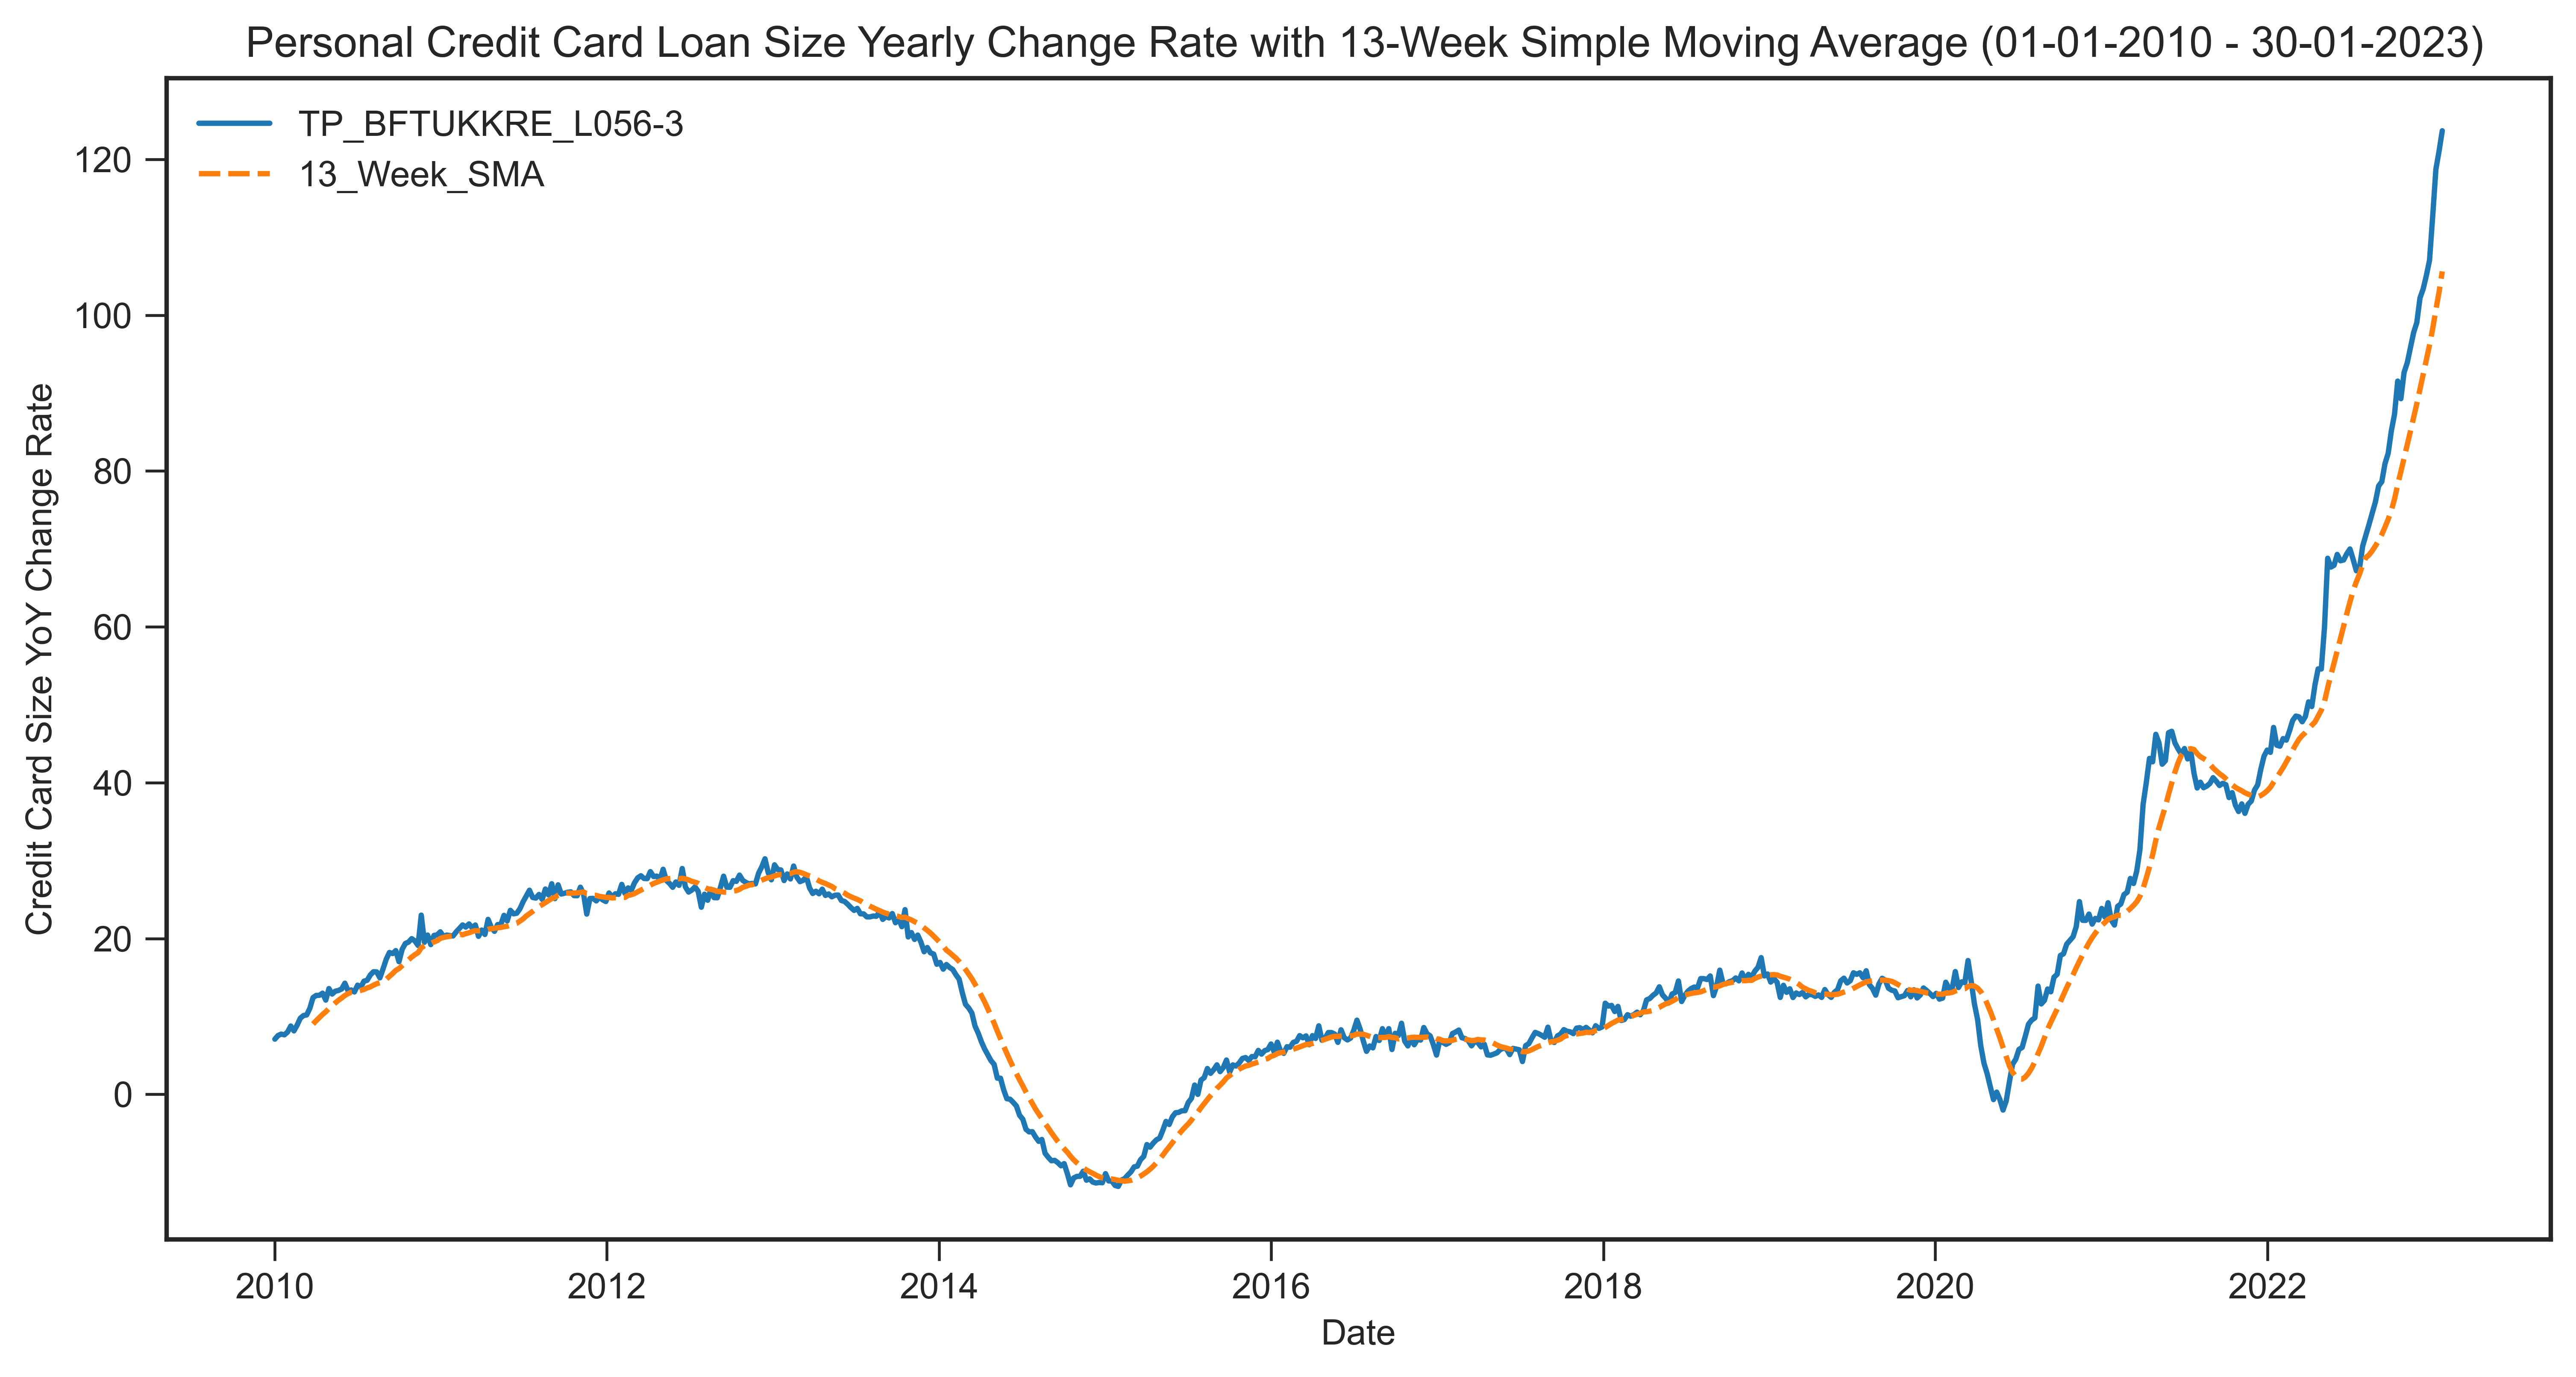

In [37]:
#Author : Alihan Ucar
from evds import evdsAPI
evds= evdsAPI('YourAPIKey')
evds.main_categories


import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def sma13weeks(var1, var2, sd, ed):
    
   

    # Load data and format the date column
    df = evds.get_data([var1], startdate = sd, enddate = ed, formulas="3")
    df['Tarih'] = pd.to_datetime(df['Tarih'], dayfirst=True)
    df = df.set_index('Tarih')

    df['13_Week_SMA'] = df[var2].rolling(window=13).mean()

    # Plot the credit card size YoY change and the 13-week SMA
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df[[var2, '13_Week_SMA']])
    plt.title(f" Personal Credit Card Loan Size Yearly Change Rate with 13-Week Simple Moving Average ({sd} - {ed})")
    plt.xlabel("Date")
    plt.ylabel("Credit Card Size YoY Change Rate")
    plt.show()

    
# You can easily change variables and apply sma function for any data that you want.
var1="TP.BFTUKKRE.L056" # Credit Card Size 
var2="TP_BFTUKKRE_L056-3" # Credit Card Size YoY Change 
sd = "01-01-2010"
ed = "30-01-2023"

sma13weeks(var1,var2,sd,ed)